# Project Overview

This project perfroms Exploratory Data Analysis (EDA) on Airbnb data to uncover trends and patterns in rental lisitngs.

# Objective

The goals of this project is to :

- Analyze price distribution - detect potential outliers in prices
- Analyze availability distribution
- Neighbourhood group insights
- Analyze room types,prices and availability across different neighborhoods
- Show relationships between number of reviews,min nights, price and availability
- Analyze geographical distribution by room type
- Show correlations among numerical features

# Dataset

The dataset contains 20,770 entries and 22 features, including:

- id : unique identifier for each listing
- name : title of the Airbnb listing
- host_name : name of the host
- neighborhood_group : group where the listing is located
- latitude/longitude : geolocation of listing
- price : nightly rental price
- room_type : type of accommodation
- reviews_per_month : average monthly reviews for the listing
- availability_365 : number of available days in the year

and many more...

# Steps and Workflow

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Load a Dataset

In [2]:
data = pd.read_csv('/kaggle/input/airbnb-listings-eda-project/datasets.csv')

# 3. Data Exploration

**1. Data overview**

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


**2. Data Information**

Here we got to understand about the data includes:

rows : 20770
columns : 22
Null : price having 20736 non-null while most others having 20763 non-nulls out of 20770
data type : need to change the data type for id, and host_id to object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

**3. Change Datatype**

Let's change the datatype for id and host_id so that we can proceed with describe()

In [5]:
#change datatype for id and host_id
data['id'] = data['id'].astype(object)
data['host_id']= data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**4. Descriptive Statistics**

Let's use describe() to check for descriptive statitics for each numerical columns.

In [6]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


# 4. Data Cleaning

**1. Handle Missing Values**

In [7]:
#check for null counts for each columns
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

Insight

- From the null counts, we can see that many rows having null values with price having the most null values.
- There are two option on how to handle the null values. first, we replace the null values with maybe the average of the data or second, we remove all the data rows with null values.
- In this case, since the dataset is quite big and its kind of not make sense to fill the null values with average, we gonna proceed with removing all the rows with nulls values using dropna().

In [8]:
#remove all the rows with null values
data.dropna(inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [9]:
#check for the data shape (count of columns and rows after dropna)
data.shape

(20736, 22)

**2. Remove Duplicates**

In [10]:
#check count for duplicated data
data.duplicated().sum()

12

In [11]:
#remove/ delete the duplicated rows
data.drop_duplicates(inplace=True)

#count of duplicated rows after drop
data.duplicated().sum()

#dataframe views of duplicated rows after drop
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


# 5. EDA

**1. Univariate Analysis**

Describes individual variable

1.1 Price Distribution

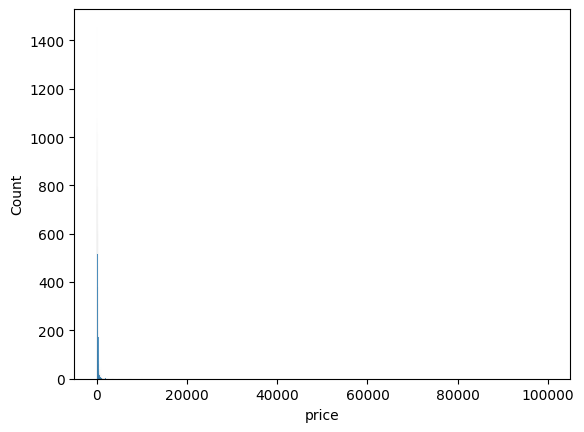

In [12]:
#Price Distribution
sns.histplot(data=data, x='price')
plt.show()

Insight

- seems like there's outliers. Most of data lies on price <20000 but some might having price around 100,000.
- Need try plot with boxplot for better view on outliers.

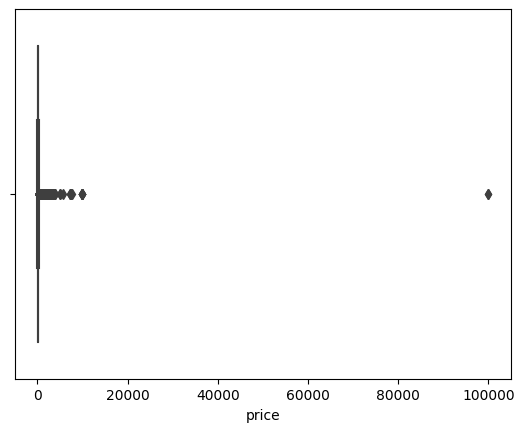

In [13]:
#identifying outliers in price
sns.boxplot(data=data, x='price')
plt.show()

Insight

- We add a condition and visualize with boxplot to identify the the acceptable range.
- We try add condition of <2000 yet still having outliers.
- We end up with <1500 and able to see that the data is well distributed.

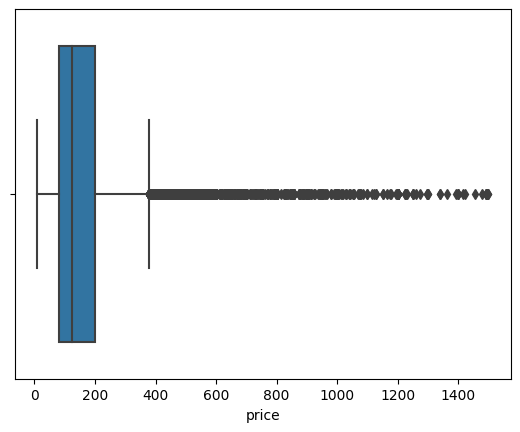

In [14]:
#New dataframe with removed outliers
df = data[data['price']<1500]

sns.boxplot(data=df, x='price')
plt.show()

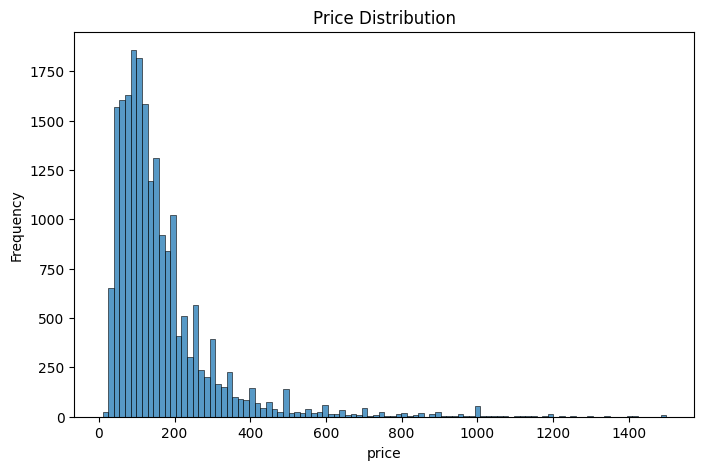

In [15]:
#visualize the df with histogram for price distribution 
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='price', bins=100)
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [16]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

1.2 Availability_365 Distribution

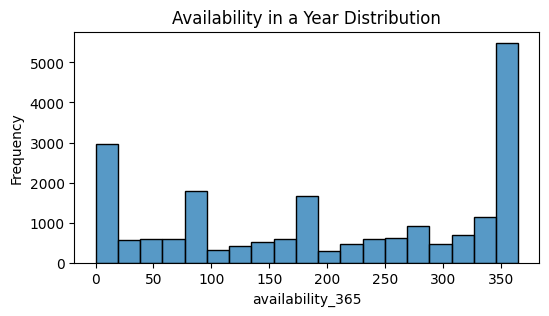

In [17]:
#Visualize distribution using histogram
plt.figure(figsize=(6,3))
sns.histplot(data = df, x='availability_365')
plt.title('Availability in a Year Distribution')
plt.ylabel('Frequency')
plt.show()

1.3 Analysis on Average Price by Neighbourhood Group

In [18]:
df.groupby(by='neighbourhood_group')['price'].mean()

#the price is referring to beds counts.May not a good analysis to compare avg price with different beds count.

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

**Feature Engineering**

- To analyse the price by single bed, we need to do some calculation to create a column with price by single bed.

In [19]:
#add new column with price per bed
df['price per bed'] = df['price']/df['beds']

In [20]:
#analyze the average of price per bed by neighbourhood group
df.groupby(by='neighbourhood_group')['price per bed'].mean()


#now thats looks better

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

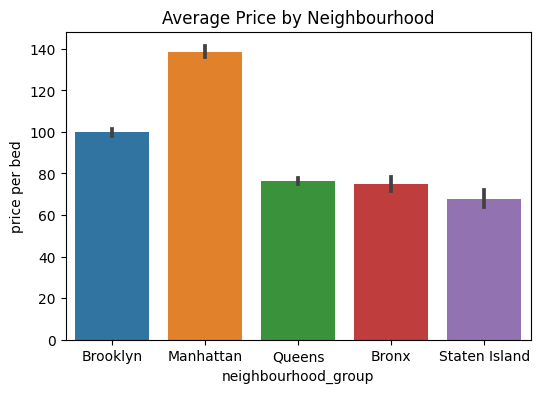

In [21]:
#visualize the barplot on average price by neighbourhood group
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='neighbourhood_group', y='price per bed')
plt.title('Average Price by Neighbourhood')
plt.show()

**2. Bivariate Analysis**

Explores relationships between two variables

2.1 Analysis on Price by Neighbourhood Group and Group Type

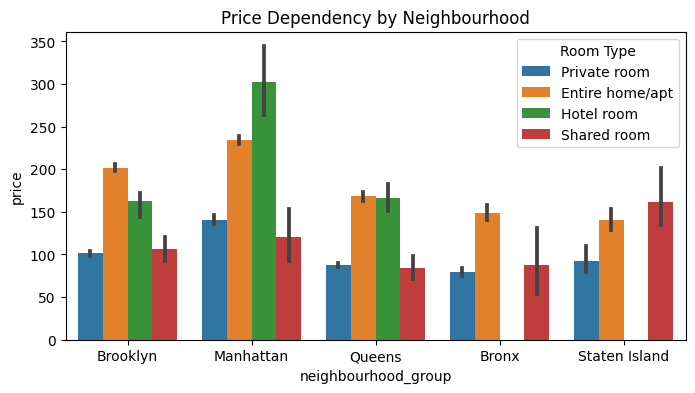

In [22]:
#price dependency by neighbourhood
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Price Dependency by Neighbourhood')
plt.legend(loc='upper right', title='Room Type')
plt.show()

2.2 Analysis on the relationship of number of reviews and price by neighbourhood group

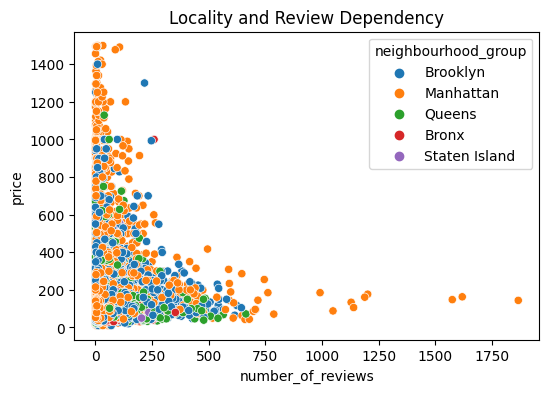

In [23]:
#visualize the scatterplot to check for relationship
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group')
plt.title('Locality and Review Dependency')
plt.show()

2.3 Pairplot

To visualize relationships between multiple variables. As for diagonal plots, it give us an immediate sense o the shape of each variable's distribution (ex; normal,skewed, etc)

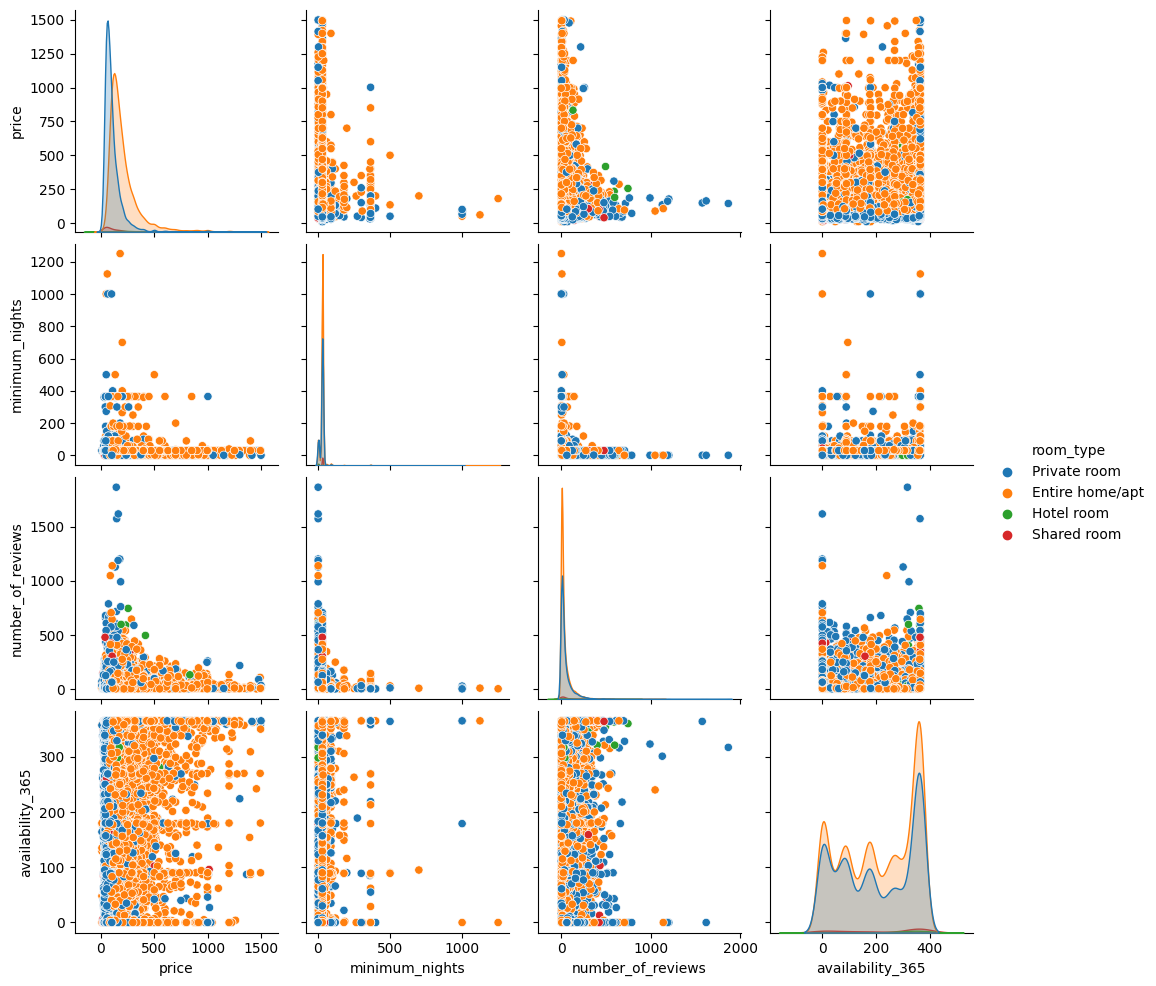

In [24]:
#to show relationships between number of reviews,min nights, price and availability
sns.pairplot(data=df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='room_type')

2.4 Geographical Distribution

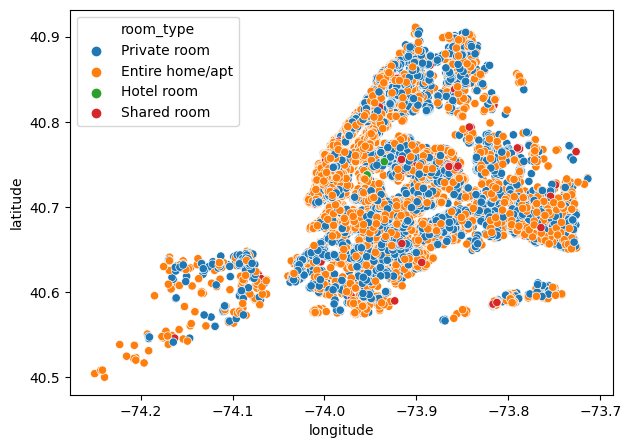

In [25]:
#Geographical Distribution of Airbnb Listing
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.show()

2.5 Heatmap

In [26]:
#correlation of one variable with others for numerical column
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


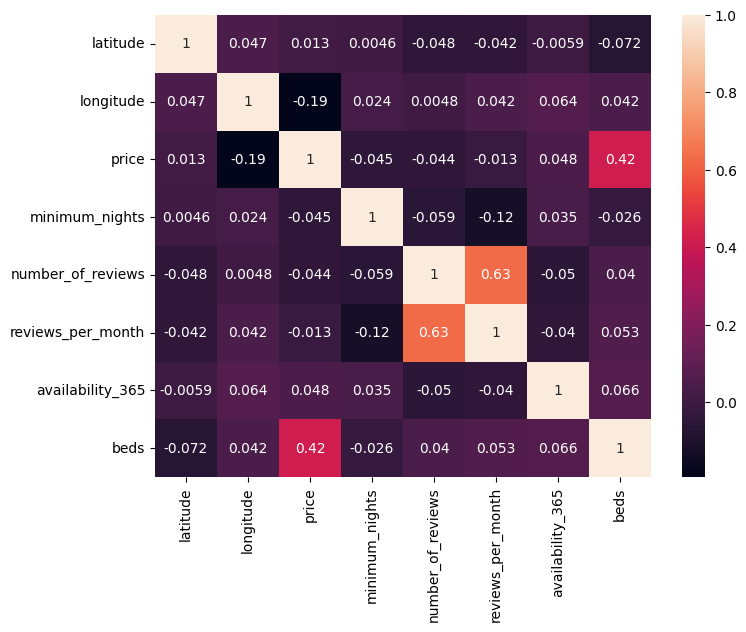

In [27]:
#visualize the correlation with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True)
plt.show()

# 6. Key Insights

1. Price Trends

    - Manhattan has the highest prices, with Brooklyn next. This shows how location affects how much people charge.

2. Room Type Distribution

    - Entire homes or apartments cost the most, while private rooms are cheaper and better for travelers on a budget.

3. Outliers

    - listings were priced over $10,000 per night, which is not normal. These outliers should be removed to get better results.

5. Availability Patterns

    - Places that are available most of the year usually have more reviews and lower prices. This could mean they get booked more often because they are affordable and reliable.